<a href="https://colab.research.google.com/github/TioSatrio100/classification-of-fresh-and-non-fresh-fish-images/blob/main/classification_of_fresh_and_non_fresh_fish_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
import zipfile,os


local_zip = 'FishDataset3.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [6]:
data_dir = 'rps/FishDataset3/data'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

os.listdir('rps/FishDataset3/data/train')
os.listdir('rps/FishDataset3/data/val')

['fresh', 'nonfresh']

In [7]:
print(len(os.listdir('rps/FishDataset3/fresh')))
print(len(os.listdir('rps/FishDataset3/nonfresh')))

20
20


In [8]:

train_fresh_dir = os.path.join(train_dir, 'fresh')
train_nonfresh_dir = os.path.join(train_dir, 'nonfresh')




validation_fresh_dir = os.path.join(validation_dir, 'fresh')
validation_nonfresh_dir = os.path.join(validation_dir, 'nonfresh')


In [9]:
fresh_imgs = os.listdir(train_fresh_dir)
nonfresh_imgs = os.listdir(train_nonfresh_dir)


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

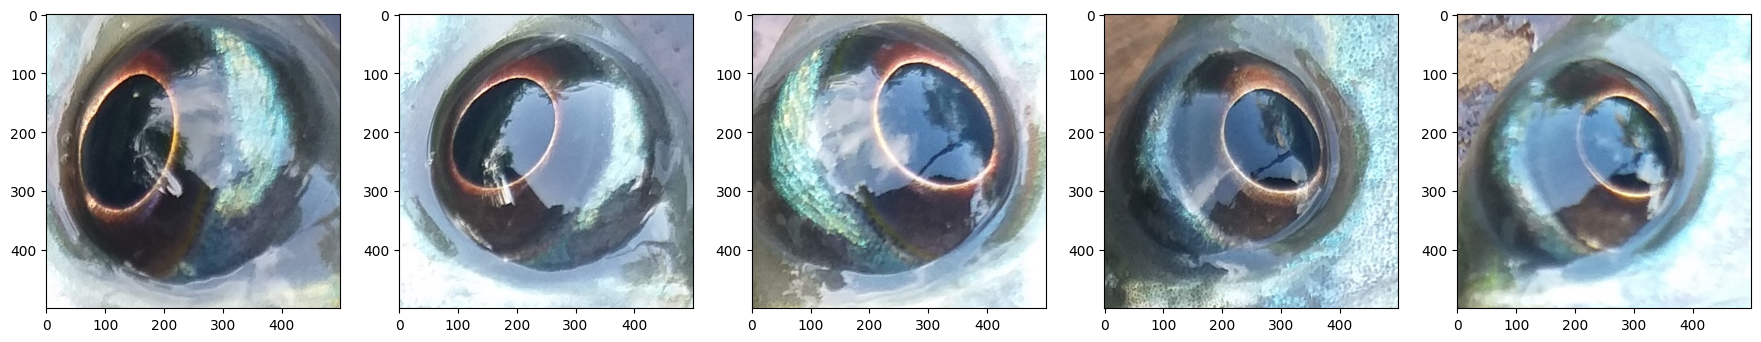

In [11]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(fresh_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(train_fresh_dir, img_path))
    plt.imshow(img)
plt.show()

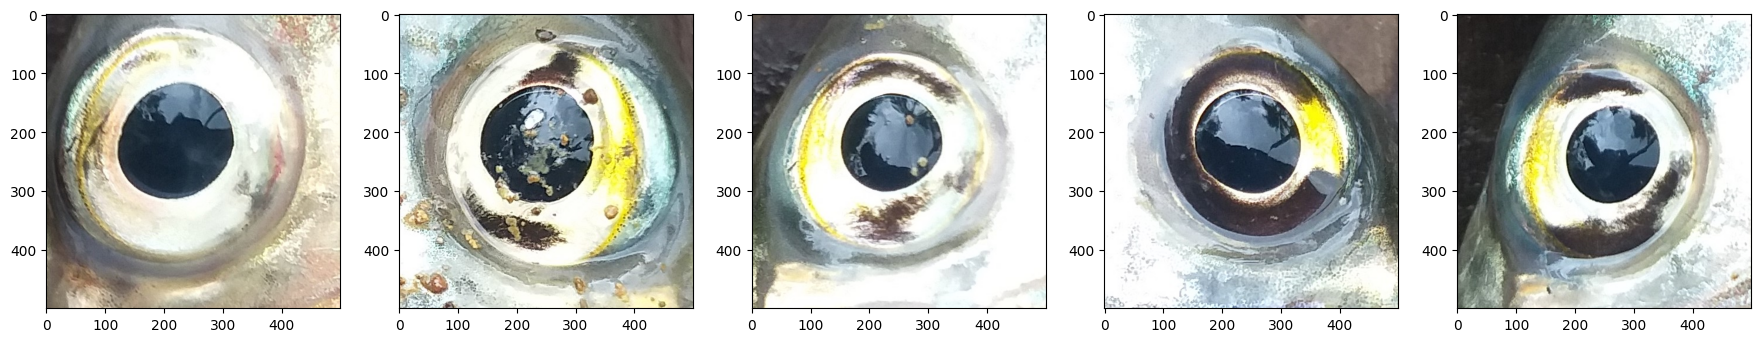

In [12]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(nonfresh_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(train_nonfresh_dir, img_path))
    plt.imshow(img)
plt.show()

In [18]:
#Augmentation


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)


In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    seed=42
)


valid_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    seed=42
)



Found 40 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'fresh': 0, 'nonfresh': 1}

In [21]:
valid_generator.class_indices

{'fresh': 0, 'nonfresh': 1}

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolution layers and more here
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolution layers and more here

# Flatten layers to flatten the output
model.add(Flatten())


# Final Dense layer
model.add(Dense(1, activation='sigmoid'))
# Example for binary classification






model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 498, 498, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 249, 249, 64)      0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3968064)           0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3968065   
                                                                 
Total params: 3969857 (15.14 MB)
Trainable params: 3969857 (15.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
output_sebelum_dense = model.layers[-2].output
print(output_sebelum_dense)

KerasTensor(type_spec=TensorSpec(shape=(None, 3968064), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")


In [38]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

# More layers here

# Flatten Layer
model.add(Flatten())

# Final Dense layer with 1 unit for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile models
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [39]:
myhistory=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator), # Number of batches per epoch
    epochs=20, # Adjust as needed
    validation_data=valid_generator,
    validation_steps=len(valid_generator), # Number of batches per epoch for validation
    verbose=2
)

Epoch 1/20
2/2 - 2s - loss: 3.1267 - accuracy: 0.4500 - val_loss: 5.2209 - val_accuracy: 0.5000 - 2s/epoch - 799ms/step
Epoch 2/20
2/2 - 0s - loss: 4.8588 - accuracy: 0.4000 - val_loss: 2.3145 - val_accuracy: 0.5000 - 295ms/epoch - 147ms/step
Epoch 3/20
2/2 - 0s - loss: 2.1723 - accuracy: 0.5000 - val_loss: 0.2683 - val_accuracy: 1.0000 - 291ms/epoch - 146ms/step
Epoch 4/20
2/2 - 0s - loss: 0.7389 - accuracy: 0.6500 - val_loss: 1.0597 - val_accuracy: 0.5000 - 303ms/epoch - 151ms/step
Epoch 5/20
2/2 - 0s - loss: 0.9093 - accuracy: 0.6250 - val_loss: 0.1247 - val_accuracy: 0.9444 - 323ms/epoch - 162ms/step
Epoch 6/20
2/2 - 0s - loss: 0.3378 - accuracy: 0.7750 - val_loss: 0.3951 - val_accuracy: 0.7778 - 298ms/epoch - 149ms/step
Epoch 7/20
2/2 - 0s - loss: 0.2210 - accuracy: 0.9000 - val_loss: 0.1139 - val_accuracy: 0.9444 - 310ms/epoch - 155ms/step
Epoch 8/20
2/2 - 1s - loss: 0.2035 - accuracy: 0.9000 - val_loss: 0.3400 - val_accuracy: 0.8889 - 755ms/epoch - 378ms/step
Epoch 9/20
2/2 - 0s

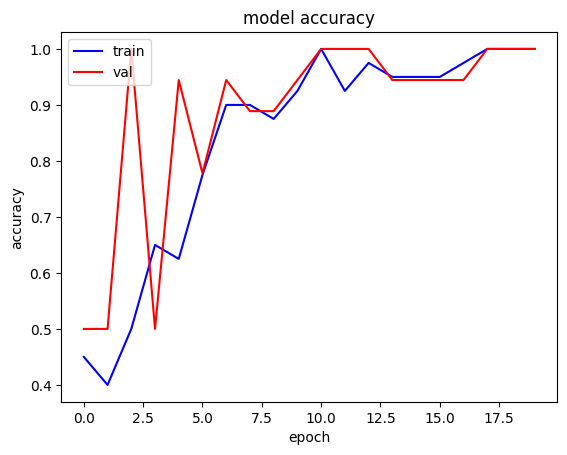

<function matplotlib.pyplot.show(close=None, block=None)>

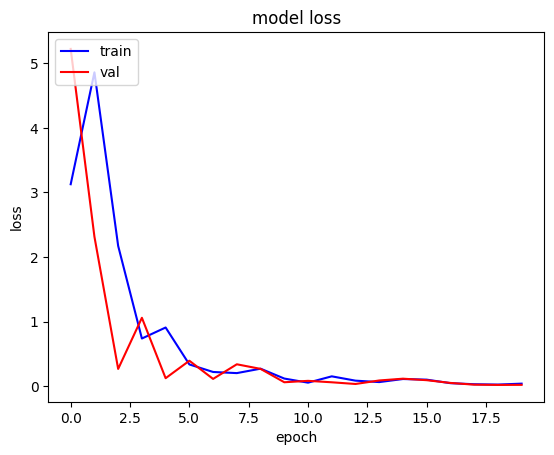

In [40]:
#Plot curves of training and validation data
import matplotlib.pyplot as plt

acc = myhistory.history['accuracy']
val_acc = myhistory.history['val_accuracy']

loss = myhistory.history['loss']
val_loss = myhistory.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show


In [41]:
model.name

'sequential_5'

Saving [Downloader.la]-6284c7a3e625e.jpg to [Downloader.la]-6284c7a3e625e.jpg
Fisherman Fish Analysis Results
1/1 [==============================] - 0s 80ms/step
fresh


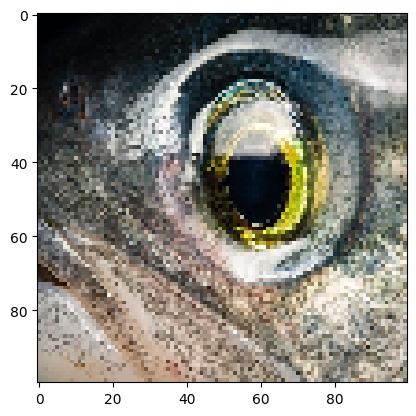

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


# Upload image
uploaded = files.upload()

for fn in uploaded.keys():
    # Load image
    img = image.load_img(fn, target_size=(100, 100))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    print('Fisherman Fish Analysis Results')

    # Make predictions
    classes = model.predict(x)

    # Show prediction results
predicted_class = np.argmax(classes, axis=1)
if predicted_class[0] == 1:
    print('nonfresh')
elif predicted_class[0] == 0:
    print('fresh')


